Fortaleza, 03 de janeiro de 2025

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [351]:
# Carregar os dados
df_dolar_diario = pd.read_csv('./DadosBrutos/USD_BRL Dados Históricos (2).csv')
# Converter a coluna 'Data' para o formato datetime
df_dolar_diario['Data'] = pd.to_datetime(df_dolar_diario['Data'], format='%d.%m.%Y')

#Organizando pela data mais antiga para a mais atual
df_dolar_diario = df_dolar_diario.sort_values(by='Data', ascending=True)

# Definir o intervalo de datas
inicio = '2023-01-02'
fim = '2024-01-02'

# Filtrar as instâncias com base na coluna 'Data'
df_filtrado = df_dolar_diario[(df_dolar_diario['Data'] >= inicio) & (df_dolar_diario['Data'] <= fim)]
df_filtrado

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
534,2023-01-02,"5,3633","5,2865","5,3671","5,2861","84,04K","1,46%"
533,2023-01-03,"5,4797","5,3638","5,4802","5,3396","188,23K","2,17%"
532,2023-01-04,"5,4312","5,4799","5,4799","5,4248","175,09K","-0,89%"
531,2023-01-05,"5,3509","5,4315","5,4315","5,3478","148,32K","-1,48%"
530,2023-01-06,"5,2254","5,3514","5,3697","5,2186","154,80K","-2,35%"
...,...,...,...,...,...,...,...
277,2023-12-27,"4,8267","4,8107","4,8408","4,8018",NaN,"0,26%"
276,2023-12-28,"4,8521","4,8323","4,8714","4,8175",NaN,"0,53%"
275,2023-12-29,"4,8521","4,8521","4,8521","4,8521",NaN,"0,00%"
274,2024-01-01,"4,8526","4,8534","4,8534","4,8534",NaN,"0,01%"


In [352]:
'''
X_train -> Data t
y_train -> Cotação (Último) passada

X_test -> Data t+1
y_test -> Cotação (Último) prevista
'''

'\nX_train -> Data t\ny_train -> Cotação (Último) passada\n\nX_test -> Data t+1\ny_test -> Cotação (Último) prevista\n'

In [353]:
X_train = (df_filtrado['Data'] - pd.Timestamp(inicio)) // pd.Timedelta('1D') #df_filtrado['Data'].to_numpy()
y_train = df_filtrado['Último'].str.replace(',', '.').astype(float).to_numpy()

In [354]:
X_train.values

array([  0,   1,   2,   3,   4,   7,   8,   9,  10,  11,  14,  15,  16,
        17,  18,  21,  22,  23,  24,  25,  28,  29,  30,  31,  32,  35,
        36,  37,  38,  39,  42,  43,  44,  45,  46,  49,  50,  51,  52,
        53,  56,  57,  58,  59,  60,  63,  64,  65,  66,  67,  70,  71,
        72,  73,  74,  77,  78,  79,  80,  81,  84,  85,  86,  87,  88,
        91,  92,  93,  94,  95,  98,  99, 100, 101, 102, 105, 106, 107,
       108, 109, 112, 113, 114, 115, 116, 119, 120, 121, 122, 123, 126,
       127, 128, 129, 130, 133, 134, 135, 136, 137, 140, 141, 142, 143,
       144, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 161, 162,
       163, 164, 165, 168, 169, 170, 171, 172, 175, 176, 177, 178, 179,
       182, 183, 184, 185, 186, 189, 190, 191, 192, 193, 196, 197, 198,
       199, 200, 203, 204, 205, 206, 207, 210, 211, 212, 213, 214, 217,
       218, 219, 220, 221, 224, 225, 226, 227, 228, 231, 232, 233, 234,
       235, 238, 239, 240, 241, 242, 245, 246, 247, 248, 249, 25

In [355]:
X_train = X_train.to_numpy().reshape(-1, 1)

In [356]:
y_train

array([5.3633, 5.4797, 5.4312, 5.3509, 5.2254, 5.2546, 5.1997, 5.16  ,
       5.1082, 5.0956, 5.1474, 5.1003, 5.1863, 5.1741, 5.2074, 5.2076,
       5.1392, 5.0734, 5.0658, 5.1089, 5.1162, 5.0731, 5.0547, 5.0504,
       5.1522, 5.1464, 5.2101, 5.2007, 5.2911, 5.2151, 5.1596, 5.1923,
       5.219 , 5.2178, 5.1674, 5.1674, 5.1675, 5.1522, 5.1373, 5.21  ,
       5.2008, 5.2367, 5.1794, 5.2006, 5.1956, 5.1534, 5.191 , 5.1453,
       5.1645, 5.2166, 5.2459, 5.2543, 5.2882, 5.2285, 5.2778, 5.2368,
       5.243 , 5.2369, 5.2973, 5.2463, 5.1983, 5.1655, 5.1356, 5.0938,
       5.0631, 5.0632, 5.0716, 5.034 , 5.057 , 5.0549, 5.0655, 5.0054,
       4.9181, 4.9272, 4.9096, 4.9413, 4.984 , 5.0753, 5.0486, 5.0486,
       5.0337, 5.0497, 5.0435, 4.9771, 4.9865, 4.9889, 5.0387, 4.9949,
       4.9822, 4.9518, 5.0097, 4.9862, 4.9424, 4.9295, 4.9195, 4.8904,
       4.9402, 4.9396, 4.9652, 4.9981, 4.9667, 4.9714, 4.9619, 5.0356,
       4.9939, 5.0171, 5.0357, 5.0574, 5.014 , 4.9571, 4.9289, 4.9125,
      

In [357]:
# Definir o intervalo de datas
inicio = '2024-03-03'
fim = '2024-03-15'

# Filtrar as instâncias com base na coluna 'Data'
df_filtrado = df_dolar_diario[(df_dolar_diario['Data'] >= inicio) & (df_dolar_diario['Data'] <= fim)]
X_test = (df_filtrado['Data'] - pd.Timestamp(inicio)) // pd.Timedelta('1D') #df_filtrado['Data'].to_numpy()
X_test = X_test.to_numpy().reshape(-1, 1)
y_test_real = df_filtrado['Último'].str.replace(',', '.').astype(float).to_numpy()

In [358]:
X_train[-1]

array([365], dtype=int64)

In [359]:
X_test_real = X_test + X_train[-1]
X_test_real

array([[366],
       [367],
       [368],
       [369],
       [370],
       [373],
       [374],
       [375],
       [376],
       [377]], dtype=int64)

In [360]:
y_test_real.shape

(10,)

C:\Users\Mateus\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


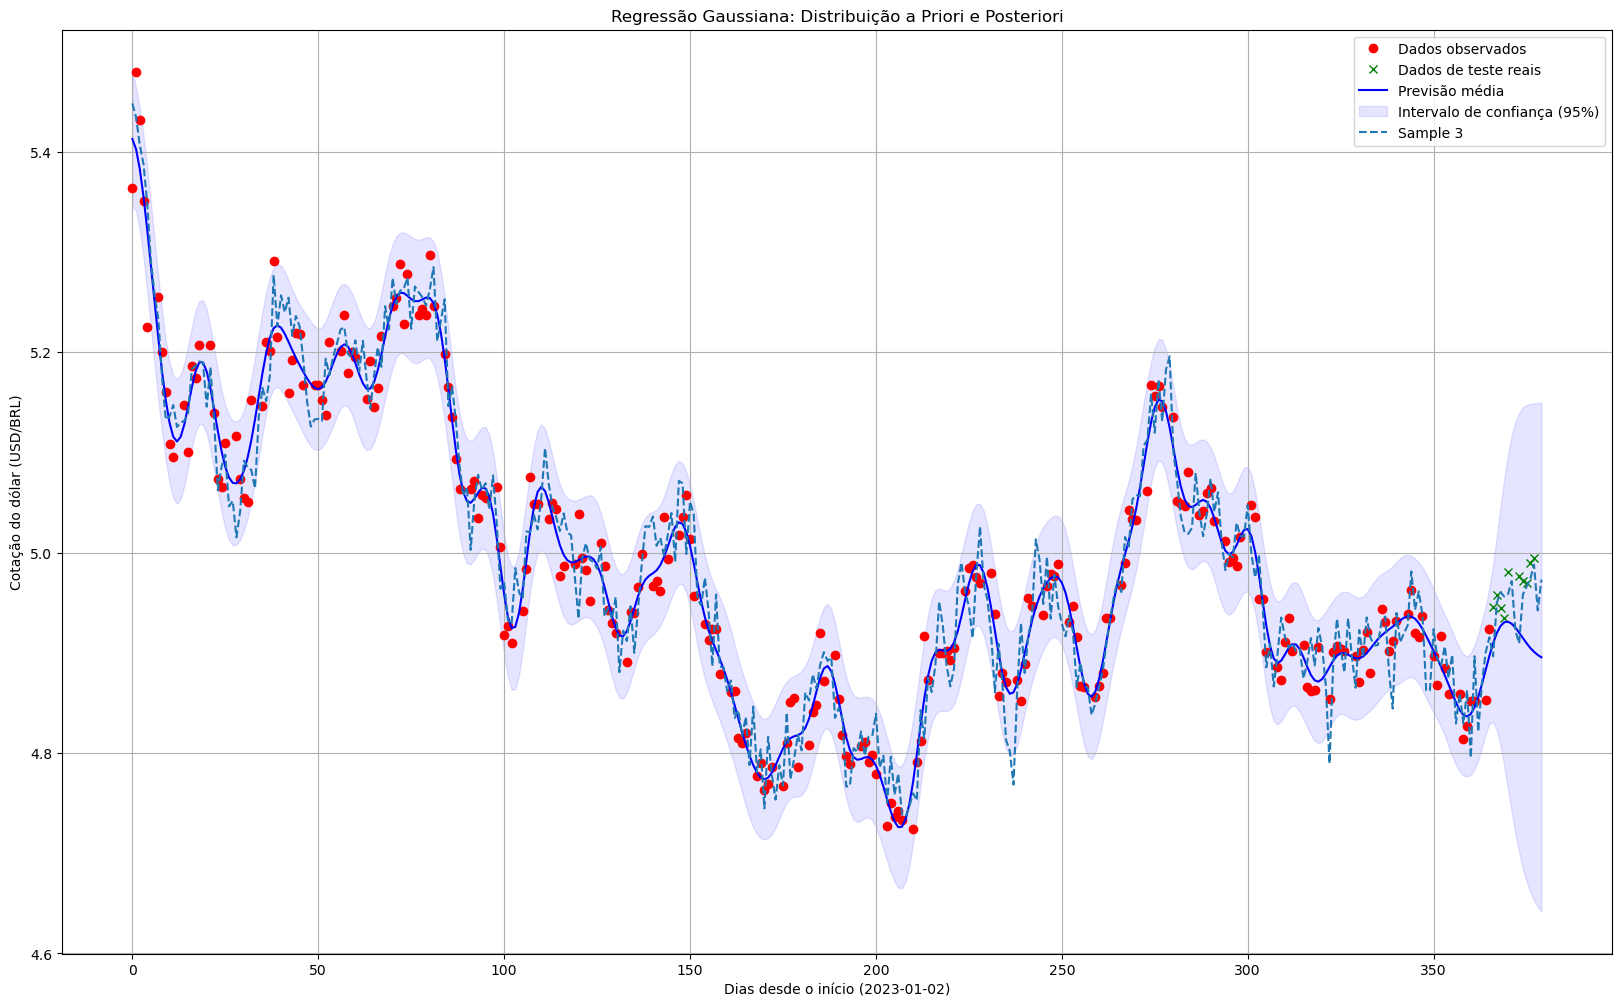

Erro RMSE (Treino): 0.0234
Erro RMSE (Teste): 0.0563


In [383]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, WhiteKernel, ConstantKernel

kernel = (
    ConstantKernel(2.0, (0.01, 100)) * RBF(length_scale=15.0, length_scale_bounds=(0.01, 100))
    + RationalQuadratic(alpha=0.1, length_scale=10.0)
    + WhiteKernel(noise_level=0.01)
)

gpr = GaussianProcessRegressor(kernel=kernel, random_state=0, normalize_y=False)

# Treinar o modelo nos dados observados
gpr.fit(X_train, y_train)

# Gerar valores para prever (incluindo regiões não vistas)
X_test = np.arange(X_train.min(), X_train.max() + 15).reshape(-1, 1)
# Fazer previsões e calcular a distribuição posterior
mean_prediction, std_prediction = gpr.predict(X_test, return_std=True)

# Amostrar novos valores a partir da distribuição posterior
n_samples = 5  # Número de amostras
posterior_samples = gpr.sample_y(X_test, n_samples)

# Plotar resultados
plt.figure(figsize=(20, 12))

# Plot da previsão média e intervalo de confiança
plt.plot(X_train, y_train, "o",color='red', label="Dados observados")
plt.plot(X_test_real, y_test_real, "x",color='green', label="Dados de teste reais")

plt.plot(X_test, mean_prediction, "b-", label="Previsão média")
plt.fill_between(
    X_test.flatten(),
    mean_prediction - 2 * std_prediction,
    mean_prediction + 2 * std_prediction,
    color="blue",
    alpha=0.1,
    label="Intervalo de confiança (95%)",
)

# Plot das amostras da distribuição posterior
for i in range(n_samples):
    if i == 2:
        plt.plot(X_test, posterior_samples[:, i], "--", label=f"Sample {i+1}")

plt.xlabel("Dias desde o início (2023-01-02)")
plt.ylabel("Cotação do dólar (USD/BRL)")
plt.legend()
plt.title("Regressão Gaussiana: Distribuição a Priori e Posteriori")
plt.grid()
plt.show()

from sklearn.metrics import root_mean_squared_error

y_pred_train, _ = gpr.predict(X_train, return_std=True)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f"Erro RMSE (Treino): {rmse_train:.4f}")

y_pred_test, _ = gpr.predict(X_test_real, return_std=True)
rmse_test = root_mean_squared_error(y_test_real, y_pred_test)
print(f"Erro RMSE (Teste): {rmse_test:.4f}")

In [378]:
y_pred, y_test

(array([5.40675708, 5.36242699, 5.32254962, 5.28737944, 5.25698597,
        5.19277399, 5.17916964, 5.16865574, 5.16068065, 5.15468979,
        5.14356908, 5.14076876, 5.13793611, 5.13491672, 5.13164762,
        5.12091852, 5.1175384 , 5.11460607, 5.1123516 , 5.11099288,
        5.11395526, 5.11758688, 5.12253492, 5.1286981 , 5.13591378,
        5.16150505, 5.17039497, 5.17895369, 5.18688595, 5.19392409,
        5.20765984, 5.20938854, 5.2096544 , 5.2085305 , 5.20614923,
        5.19351576, 5.18833241, 5.18313732, 5.1782166 , 5.17384061,
        5.1662347 , 5.16608511, 5.16727872, 5.16982675, 5.17368779,
        5.19200933, 5.19977575, 5.2079973 , 5.21641615, 5.22476325,
        5.24667667, 5.25208718, 5.25617131]),
 array([4.9458, 4.9581, 4.9446, 4.935 , 4.9806, 4.9771, 4.9718, 4.97  ,
        4.9895, 4.9949, 5.0253, 5.0301, 4.9691, 4.9781, 4.9997, 4.9751,
        4.9808, 4.9866, 5.0129, 5.0153, 5.0543, 5.0576, 5.0393, 5.0538,
        5.0655, 5.0268, 5.009 , 5.0746, 5.0917, 5.1175, 5.

In [366]:
print(gpr.kernel_)

0.1**2 * RBF(length_scale=5.27) + RationalQuadratic(alpha=0.0112, length_scale=497) + WhiteKernel(noise_level=0.000735)


In [386]:
# Select the posterior sample (for example, the first sample)
sample_index = 2  # You can change this index to select a different posterior sample
posterior_sample = posterior_samples[:, sample_index]

# Predict the test data using this posterior sample
# The `posterior_sample` should correspond to the predicted values for X_test
y_pred_sample = posterior_sample

# Calculate RMSE for this sample
rmse_sample = np.sqrt(mean_squared_error(y_train, y_pred_sample))
print(f"RMSE for Posterior Sample {sample_index + 1}: {rmse_sample:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [262, 380]

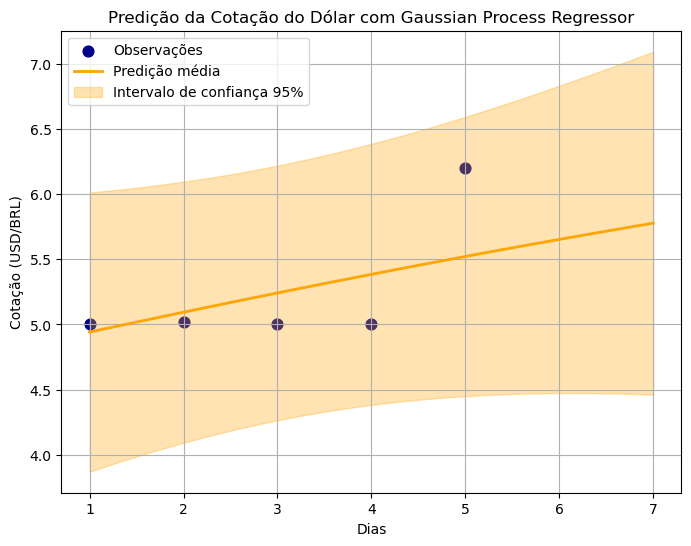

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel

# Dados de exemplo para previsão do dólar (dias e cotações observadas)
x_observed = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y_observed = np.array([5.00, 5.02, 5.00, 5.00, 6.20])

# Criando pontos futuros para previsão
x_future = np.linspace(1, 7, 100).reshape(-1, 1)

# Definição do kernel (RBF para suavidade + WhiteKernel para modelar ruído)
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)

# Criando o modelo de processo Gaussiano
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Ajustando o modelo aos dados observados
gp.fit(x_observed, y_observed)

# Fazendo previsões para os próximos dias
y_predicted, sigma = gp.predict(x_future, return_std=True)

# Criando o gráfico
plt.figure(figsize=(8, 6))

# Plotando observações reais
plt.scatter(x_observed, y_observed, c='darkblue', s=60, label="Observações")

# Predição média (linha laranja contínua)
plt.plot(x_future, y_predicted, 'orange', linewidth=2, label="Predição média")

# Intervalo de confiança (±2 sigma)
plt.fill_between(x_future.ravel(), y_predicted - 2 * sigma, y_predicted + 2 * sigma,
                 color='orange', alpha=0.3, label="Intervalo de confiança 95%")

# Configurações do gráfico
plt.title("Predição da Cotação do Dólar com Gaussian Process Regressor")
plt.xlabel("Dias")
plt.ylabel("Cotação (USD/BRL)")
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


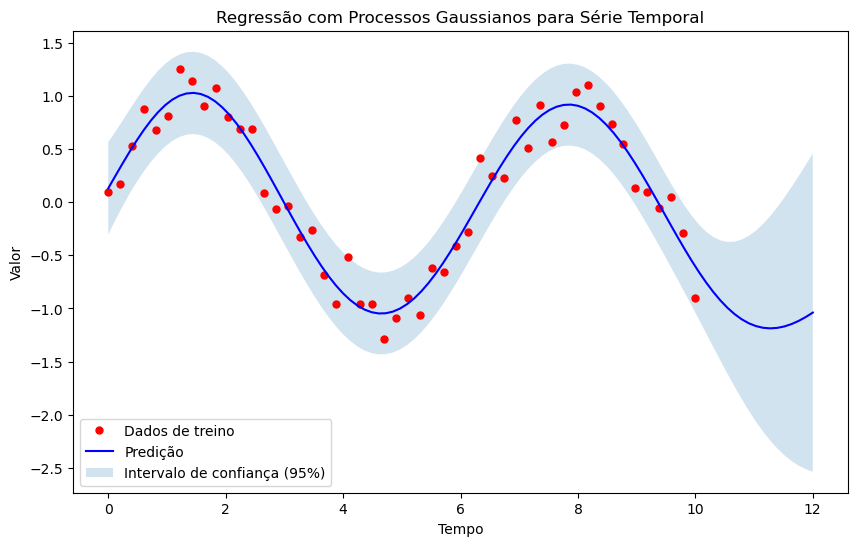

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Gerar dados sintéticos para a série temporal
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)  # 50 pontos de entrada
y = np.sin(X).ravel() + 0.2 * np.random.normal(size=X.shape[0])  # Função seno com ruído

# Definir o kernel com RBF (para capturar padrões suaves) e WhiteKernel (para modelar ruído)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)

# Criar e treinar o modelo de regressão por processo gaussiano
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# Fazer previsões em novos pontos
X_pred = np.linspace(0, 12, 100).reshape(-1, 1)
y_pred, sigma = gp.predict(X_pred, return_std=True)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'r.', markersize=10, label="Dados de treino")
plt.plot(X_pred, y_pred, 'b-', label="Predição")
plt.fill_between(X_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label="Intervalo de confiança (95%)")
plt.title("Regressão com Processos Gaussianos para Série Temporal")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend()
plt.show()


Root Mean Squared Error (RMSE): 0.1837
R² Score: 0.8672


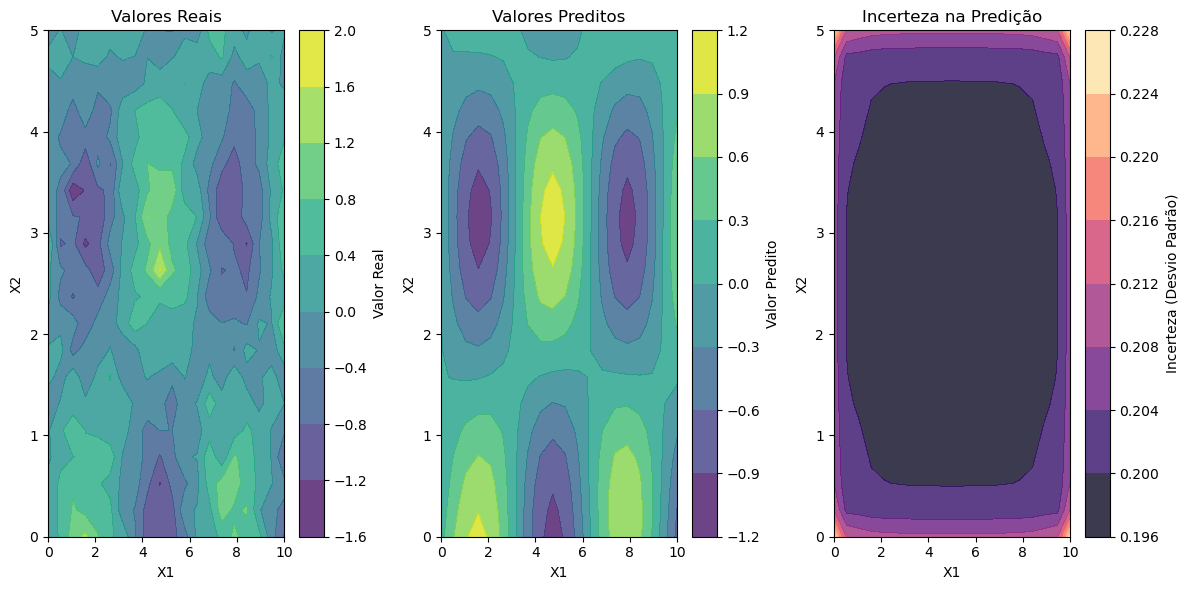

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error, r2_score

# Gerando dados sintéticos com duas variáveis independentes
np.random.seed(42)
x1 = np.linspace(0, 10, 20)
x2 = np.linspace(0, 5, 20)
X1, X2 = np.meshgrid(x1, x2)
Y_real = np.sin(X1) * np.cos(X2) + 0.2 * np.random.normal(size=X1.shape)

# Preparando os dados para o modelo
X = np.vstack([X1.ravel(), X2.ravel()]).T
y = Y_real.ravel()

# Definição do kernel para o processo gaussiano
kernel = RBF(length_scale=[1.0, 1.0]) + WhiteKernel(noise_level=0.1)

# Criando e treinando o modelo de regressão por processo gaussiano com menos reinícios
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
gp.fit(X, y)

# Fazendo previsões
y_pred, sigma = gp.predict(X, return_std=True)

# Calculando métricas de desempenho
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Exibindo as métricas de performance
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plotando os resultados
plt.figure(figsize=(12, 6))

# Gráfico dos valores reais
plt.subplot(1, 3, 1)
plt.contourf(X1, X2, Y_real, cmap='viridis', alpha=0.8)
plt.colorbar(label="Valor Real")
plt.title("Valores Reais")
plt.xlabel("X1")
plt.ylabel("X2")

# Gráfico dos valores preditos
plt.subplot(1, 3, 2)
plt.contourf(X1, X2, y_pred.reshape(X1.shape), cmap='viridis', alpha=0.8)
plt.colorbar(label="Valor Predito")
plt.title("Valores Preditos")
plt.xlabel("X1")
plt.ylabel("X2")

# Gráfico da incerteza (desvio padrão)
plt.subplot(1, 3, 3)
plt.contourf(X1, X2, sigma.reshape(X1.shape), cmap='magma', alpha=0.8)
plt.colorbar(label="Incerteza (Desvio Padrão)")
plt.title("Incerteza na Predição")
plt.xlabel("X1")
plt.ylabel("X2")

plt.tight_layout()
plt.show()


Root Mean Squared Error (RMSE): 0.1837
R² Score: 0.8672


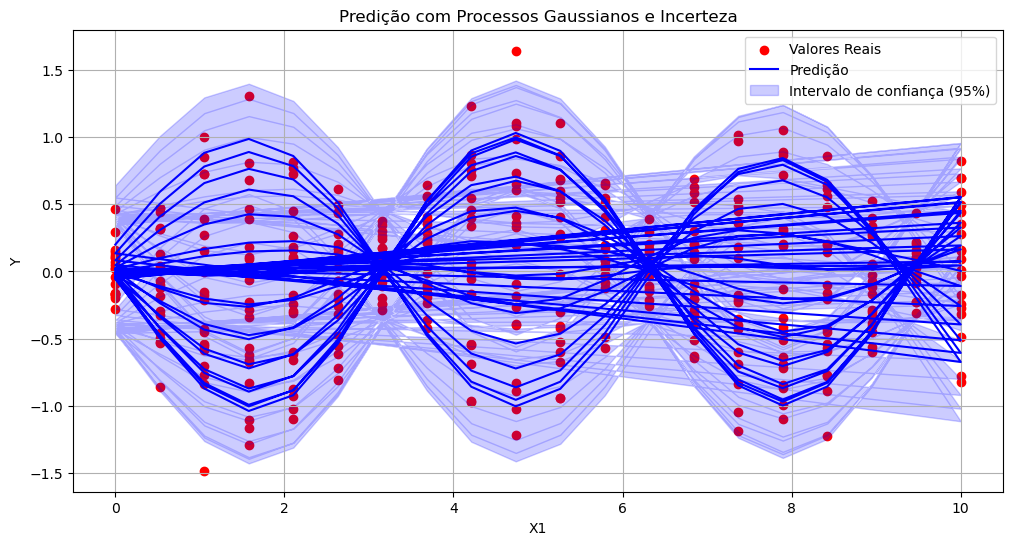

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error, r2_score

# Gerando dados sintéticos com duas variáveis independentes
np.random.seed(42)
x1 = np.linspace(0, 10, 20)
x2 = np.linspace(0, 5, 20)
X1, X2 = np.meshgrid(x1, x2)
Y_real = np.sin(X1) * np.cos(X2) + 0.2 * np.random.normal(size=X1.shape)

# Preparando os dados para o modelo
X = np.vstack([X1.ravel(), X2.ravel()]).T
y = Y_real.ravel()

# Definição do kernel para o processo gaussiano
kernel = RBF(length_scale=[1.0, 1.0]) + WhiteKernel(noise_level=0.1)

# Criando e treinando o modelo de regressão por processo gaussiano com menos reinícios
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
gp.fit(X, y)

# Fazendo previsões
y_pred, sigma = gp.predict(X, return_std=True)

# Calculando métricas de desempenho
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Exibindo as métricas de performance
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plotando os resultados com intervalos de confiança
plt.figure(figsize=(12, 6))

# Gráfico dos valores preditos com intervalo de confiança
plt.scatter(X[:, 0], y, color='red', label="Valores Reais")
plt.plot(X[:, 0], y_pred, 'b-', label="Predição")
plt.fill_between(X[:, 0],
                 y_pred - 1.96 * sigma,
                 y_pred + 1.96 * sigma,
                 color='blue', alpha=0.2, label="Intervalo de confiança (95%)")
plt.title("Predição com Processos Gaussianos e Incerteza")
plt.xlabel("X1")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()
